# Notebook 5

## Digital health and computational epidemiology
Author: Michele Tizzoni

---

# Epidemics on temporal networks 

**The temporal dynamics of networks affect dynamical processes defined one them**

In 2001, Liljeros and collaborators found that the network of human sexual contacts is "scale-free" concluding that STI can be hard to eradicate because of such property. 

See: https://www.nature.com/nature/journal/v411/n6840/full/411907a0.html

However, their conclusions were only partially true because the network of human sexual contacts is a *dynamical network* and temporal fluctuations are very important when considering a dynamical processes that take place on top of it.

In 2011, Rocha and collaborators published a temporal dataset of sexual contacts in Brazil: http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001109.
We use this dataset to simulate an epidemic process (SI) and compare results between the static aggregated network and the dynamic network.

In [1]:
import networkx as nx
from collections import defaultdict

In [24]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
!pwd

/Users/micheletizzoni/Documents/Teaching/Digital_health_compepi/notebooks/backup


In [9]:
filepath='./../../datasets/Dataset_sexual_network.csv'

In [10]:
edgelist = defaultdict(list)

In [11]:
finput=open(filepath,'r')
for line in finput.readlines():
    
    if line[0]!='#':#not a comment
        s=line.strip().split(';')
        
        day=int(s[2])
        edge=(int(s[0]), int(s[1]))
                
        edgelist[day].append(edge)
        
finput.close()

We first create the aggregated network 

In [12]:
G_agg=nx.Graph()
G_agg.disease_status={}

In [13]:
daystart = 800#we skip the transient
dayend = 1800

In [14]:
for d in edgelist:
    if d>=daystart and d<=dayend:
        links=edgelist[d]
        G_agg.add_edges_from(links)#we add the link to the graph

print("The aggregated network has", len(G_agg.nodes()),"nodes")
print("The aggregated network has", len(G_agg.edges()),"links")

The aggregated network has 11306 nodes
The aggregated network has 23345 links


In [15]:
nx.is_connected(G_agg)

False

In [16]:
nx.number_connected_components(G_agg)

337

In [17]:
for i in nx.connected_components(G_agg):
    print(len(i))

10566
3
2
2
2
2
2
2
2
3
2
4
2
2
3
2
3
2
3
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
6
2
4
2
4
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
2
2
3
2
2
2
2
2
3
2
2
2
8
2
5
2
3
3
2
2
2
2
4
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
5
3
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
4
2
2
2
2
2
4
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


---
## Simulations on the time-aggregated graph

In [18]:
#let's choose a random seed
import random

seed_links=edgelist[daystart]
print(len(seed_links))

random.shuffle(seed_links)
seed=seed_links[0][0]

print("The degree of the seed is", G_agg.degree(seed))

12
The degree of the seed is 80


In [19]:
infected_nodes = []
infected_nodes.append(seed)

for n in G_agg.nodes():
    if n in infected_nodes:
        G_agg.disease_status[n] = 1
        #infected
    else:
        G_agg.disease_status[n] = 0
        #susceptible

In [22]:
Itime_agg = []

#there are 1000 days of network activity but the network does not change!

for t in range(0,1000):
    
    for i in infected_nodes:
        for j in G_agg.neighbors(i):
            if G_agg.disease_status[j] == 0: 
                G_agg.disease_status[j] = 1 #the probability of infection is 1!!
                
    #ciclo per aggiornare l'elenco dei nodi infetti
    infected_nodes=[]
    for n in G_agg.nodes():
        if G_agg.disease_status[n]==1:
            infected_nodes.append(n)
             
    Itime_agg.append(len(infected_nodes))

print("The final size of the epidemic is", float(len(infected_nodes))/len(G_agg.nodes()))

The final size of the epidemic is 0.9345480275959668


(0.0, 20.0, -1.0, 10600.0)

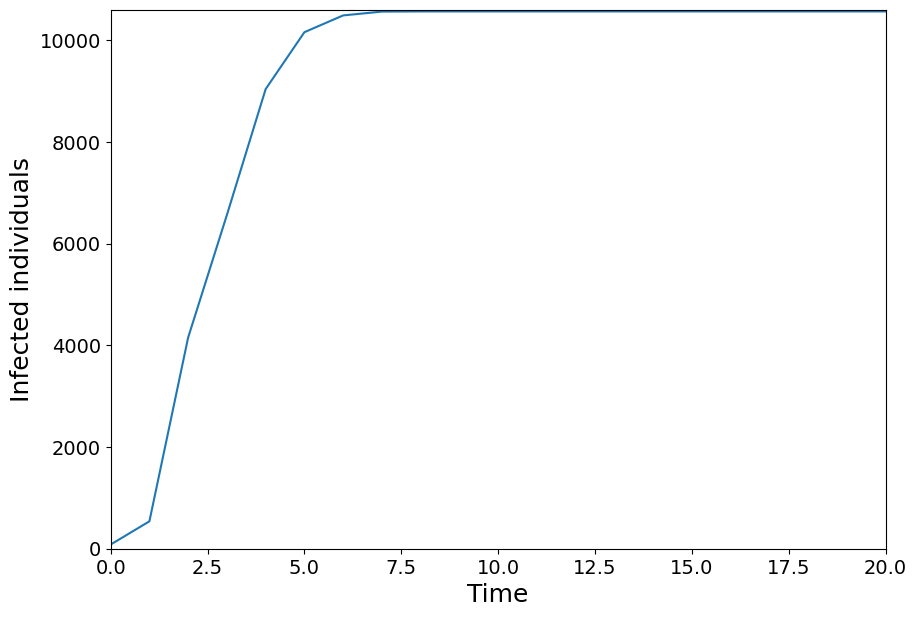

In [25]:
plt.figure(figsize=(10,7))
plt.xlabel('Time', fontsize=18)
plt.ylabel('Infected individuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(range(0,len(Itime_agg)),Itime_agg)
plt.axis([0,20,-1,10600])

---
## Simulations on the full dynamic network

In [26]:
G_dyn = nx.Graph()
G_dyn.disease_status = {}

In [27]:
seed_links = edgelist[daystart]
random.shuffle(seed_links)
seed = seed_links[0][0]

In [28]:
seed

1846

In [29]:
infected_nodes = []
infected_nodes.append(seed)

G_dyn.add_edges_from(seed_links)  # we consider only the links that are active on day 0

for n in G_dyn.nodes():
    if n in infected_nodes:
        G_dyn.disease_status[n] = 1
        # infected
    else:
        G_dyn.disease_status[n] = 0
        # susceptible

In [30]:
Itime_dyn = []

for t in range(daystart, dayend + 1):

    links = edgelist[t]  # these are the links active on day t

    if t == daystart:
        print("The temporal network has", len(G_dyn.nodes()), "nodes on day", daystart)
        print("The temporal network has", len(G_dyn.edges()), "edges on day", daystart)
        print("The degree of the seed is", G_dyn.degree(seed))
    else:
        G_dyn.add_edges_from(links)
        for e in links:
            if e[0] not in G_dyn.disease_status:
                G_dyn.disease_status[e[0]] = 0
            if e[1] not in G_dyn.disease_status:
                G_dyn.disease_status[e[1]] = 0

    # ciclo sui nodi infetti per la trasmissione
    for i in infected_nodes:
        for j in G_dyn.neighbors(i):
            if G_dyn.disease_status[j] == 0:
                G_dyn.disease_status[j] = 1

    # ciclo per aggiornare l'elenco dei nodi infetti
    infected_nodes = []
    for n in G_dyn.nodes():
        if G_dyn.disease_status[n] == 1:
            infected_nodes.append(n)

    Itime_dyn.append(len(infected_nodes))

    # stampo il numero di nodi infetti a ogni time-step
    G_dyn.remove_edges_from(links)

print(
    "The final size of the epidemic is", float(len(infected_nodes)) / len(G_dyn.nodes())
)

The temporal network has 22 nodes on day 800
The temporal network has 12 edges on day 800
The degree of the seed is 1
The final size of the epidemic is 0.7242172297894923


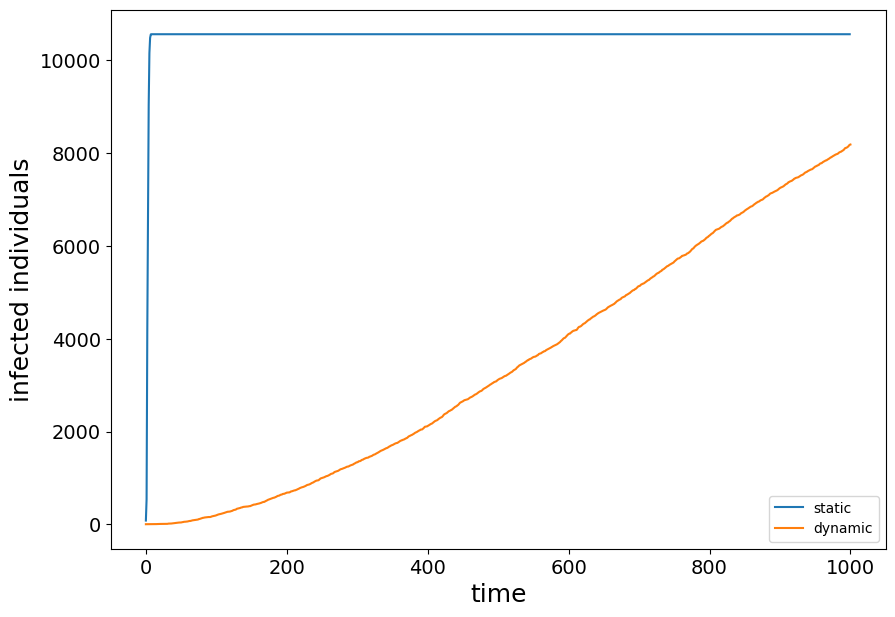

In [31]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time', fontsize=18)
plt.ylabel('infected individuals', fontsize=18)
plt.plot(range(0,len(Itime_agg)),Itime_agg, label='static')
plt.plot(range(0,len(Itime_dyn)),Itime_dyn, label='dynamic')
plt.legend()
#plt.axis([0,365,-1,10600])

---

# Tacoma library

We use the library Tacoma developed by Ben Meier. 

Documentation available here: http://rocs.hu-berlin.de/~tacoma/


In [ ]:
import tacoma as tc

In [33]:
from tacoma.interactive import visualize

In [47]:
temporal_network = tc.download_and_convert_sociopatterns_high_school2013()

AttributeError: module 'tacoma' has no attribute 'download_and_convert_sociopatterns_high_school2013'

In [ ]:
visualize(temporal_network, frame_dt = 10)

In [43]:
from tacoma.drawing import edge_activity_plot

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='edge id'>)

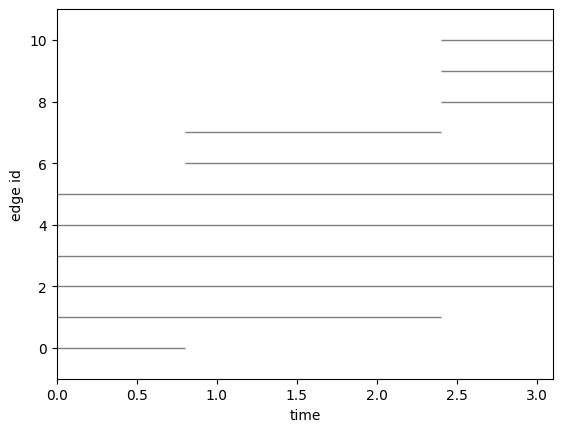

In [44]:
edge_activity_plot(temporal_network)

In [39]:
temporal_network = tc.edge_changes()
temporal_network.N = 10
temporal_network.edges_initial = [ (0,1), (2,3), (1,7), (3,5), (1,9), (7,2) ]
temporal_network.t0 = 0.0
temporal_network.t = [ 0.8, 2.4 ]
temporal_network.tmax = 3.1
temporal_network.edges_in = [ 
                              [ (0, 5), (3, 6) ], 
                              [ (3, 7), (4, 9), (7, 8) ],
                            ]
temporal_network.edges_out = [ 
                                [ (0, 1) ],
                                [ (2, 3), (3, 6) ],
                             ]

In [40]:
visualize(temporal_network, frame_dt = 0.05)

changing directory to /Users/micheletizzoni/.tacoma/web
starting server here ... /Users/micheletizzoni/.tacoma/web
preparing network 


127.0.0.1 - - [09/May/2023 19:08:14] "GET /?data=tmp_188017c28e4 HTTP/1.1" 200 -
127.0.0.1 - - [09/May/2023 19:08:14] "GET /tmp_188017c28e4_config.json HTTP/1.1" 200 -
127.0.0.1 - - [09/May/2023 19:08:14] "GET /tmp_188017c28e4/tmp_188017c28e4_0.taco HTTP/1.1" 200 -
127.0.0.1 - - [09/May/2023 19:08:14] "GET /tmp_188017c28e4/tmp_188017c28e4_0.json HTTP/1.1" 200 -


stopping server ...
was asked to stop the server
deleted all files


KeyboardInterrupt: 

In [45]:
# Structural parameters
N = 100
k = 3
rho = k/(N-1.0)

# Temporal parameters
tau = 4
omega = 1.0/tau
t_run_total = 10

# Simulate
temporal_network = tc.activity_model(N, rho, omega, t_run_total)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='edge id'>)

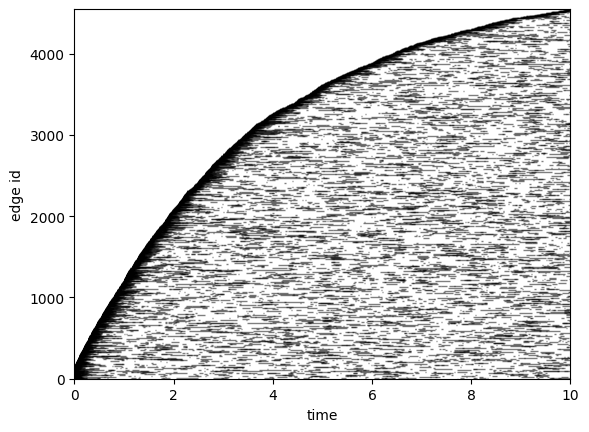

In [46]:
edge_activity_plot(temporal_network)